In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# face_detect

img = cv.imread('Resources/Photos/group 2.jpg')
# cv.imshow('Person', img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray Person', gray)

haar_cascade = cv.CascadeClassifier('haar_face.xml')

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=6)

print(f'Number of faces found = {len(faces_rect)}')

for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness=2)
    
cv.imshow('Detected Faces', img)

cv.waitKey(0)

Number of faces found = 6


-1

In [3]:
# Face Recognition

import os
import cv2 as cv
import numpy as np

people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
DIR = r'D:\Profile\Jupyter\OpenCV_Test\opencv-course-master\Resources\Faces\train'

p = []

for i in os.listdir(DIR):
    p.append(i)
    
# check
print(p)

['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']


In [6]:
# training
haar_cascade = cv.CascadeClassifier('haar_face.xml')

features = []
labels = []

def create_train():
    for person in people:
        path = os.path.join(DIR, person)
        label = people.index(person)
        
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            
            img_array = cv.imread(img_path)
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
            
            faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, 
                                                      minNeighbors=4)
            
            for (x,y,w,h) in faces_rect:
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)
                
create_train()
print('Training done -----------')
print(f'Length of the features = {len(features)}')
print(f'Length of the labels = {len(labels)}')

features = np.array(features, dtype='object')
labels = np.array(labels)

face_recognizer = cv.face.LBPHFaceRecognizer_create()

# Train the Recognizer on the features list and the lable list

face_recognizer.train(features, labels)

face_recognizer.save('face_trained.yml')
np.save('features.npy', features)
np.save('labels.npy', labels)

Training done -----------
Length of the features = 100
Length of the labels = 100


In [ ]:
# face recognization
# Load data

haar_cascade = cv.CascadeClassifier('haar_face.xml')
features = np.load('features.npy', allow_picke=True)
labels = np.load('labels.npy')

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('face_trained.yml')


Label = 0 with a confidence of 60.069416291380506


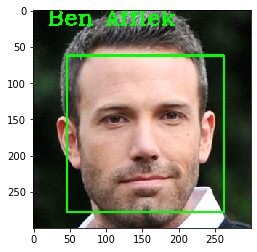

In [13]:
# test recognization
img = cv.imread(r'D:/Profile/Jupyter/OpenCV_Test/opencv-course-master/Resources/Faces/val/ben_afflek/2.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Person', gray)

# Detect the face in the image

faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
    faces_roi = gray[y:y+h, x:x+w]
    
    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {label} with a confidence of {confidence}')
    
    cv.putText(img, str(people[label]), (20,20), 
              cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), thickness=2)
    
cv.imshow('Detected face', img)
cv.waitKey(0)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Deep Computer Vision

https://www.kaggle.com/alexattia/the-simpsons-characters-dataset/notebooks